<a href="https://colab.research.google.com/github/Harold-Rodriguez/ECG/blob/main/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# TP2 : Segmentation d'image aerienne


In [54]:
import numpy as np                 #pour faire des mathematiques numeriques
import matplotlib.pyplot as plt    #pour lire et afficher des images ou des graphiques
import numpy.random as rng      #pour tirer des valeurs aléatoirement
import scipy.ndimage as scim       #pour tout ce qui tourne autour du filtrage et le traitement d'image de base
from module_image_TP2 import *         #module personalisé pour afficher des images ou des graphiques
import cv2
from sklearn.cluster import KMeans

## Exercice 1 - Segmentation par propagation de graine

### <span style="color:red"> Question 1.1 : </span> Sur l'image niveau de gris 'Tournefeuille_NDG.png', coder et tester un algorithme de propagation de front pour segmenter des toits.

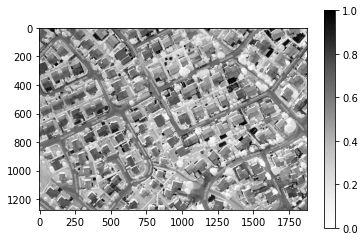

In [8]:
Im2=plt.imread('Tournefeuille_NDG.png')
Im=Im2*1.

showGLImage(Im2)

In [ ]:
def RegionPropagation(InputImage,seed,thresh):

  #...

  return SegmentedImage

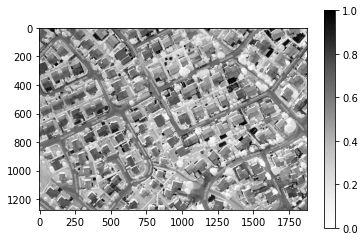

In [25]:
seed=[650,848]
ret, tresh = cv2.threshold(Im2, seed[0],seed[1], cv2.THRESH_BINARY)
tresh=plt.imread('Tournefeuille_NDG.png')
Im=tresh*1.

showGLImage(tresh)

### <span style="color:red"> Question 1.2 : </span> Segmenter les toits ayant le point [650,848], le point [638,1017], le point [289,954] et le point [778,353]. Commenter la facilite a segmenter les toits avec un algorithme de propagation.

In [ ]:
seed=[650,848]
seed=[638,1017]
seed=[778,353]
seed=[289,954]

In [ ]:
ImSeg=RegionPropagation(Im2,seed,300)
showImage1channel(Im2,mask=ImSeg)   #a modifier!

##  Exercice 2 - Segmentation automatique d'image couleur avec l'algorithme des K-means

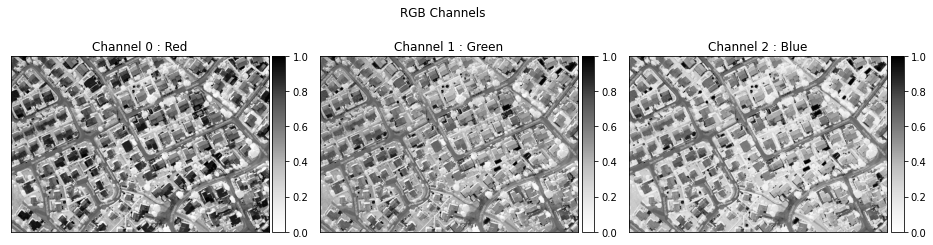

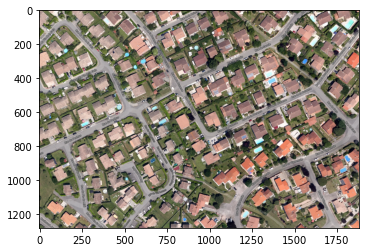

In [68]:
Im2=plt.imread('Tournefeuille_RGB.png')
Im=Im2*1.
showRGBImage_channels(Im)
showRGBImage(Im)

### <span style="color:red"> Question 2.1 : </span> Ouvrez et l'image couleur 'Tournefeuille_RGB.png' et distinguez dans quels canaux vous distinguez le mieux les piscines.  <br><br> Est-ce que les toits ressortent aussi bien sur ce canal ? <br> Est-ce que vous pensez que l'on pourra bien distinguer les toits de la route sur un seul canal ?
  

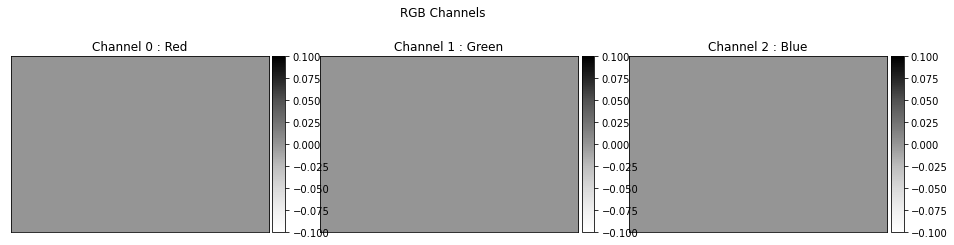

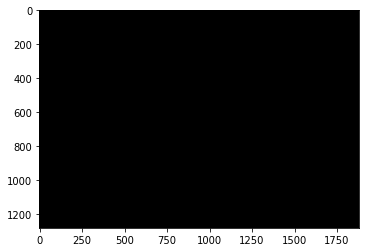

In [69]:
Im3=Im2.reshape((-1,3)) #
Im3 = np.float32(Im3)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 10, 1.0)
#Number of clusters
k=4
attempts= 100
ret, label, center=cv2.kmeans(Im3, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 =res.reshape((Im2.shape))
showRGBImage_channels(res2)
showRGBImage(res2)

In [71]:
Im3=Im2.reshape((-1,3)) 
km=KMeans(n_clusters=2)
km.fit(Im3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
img_seg=km.cluster_centers_
img_seg=img_seg[km.labels_]
img_seg=img_seg.reshape(Im2.shape)

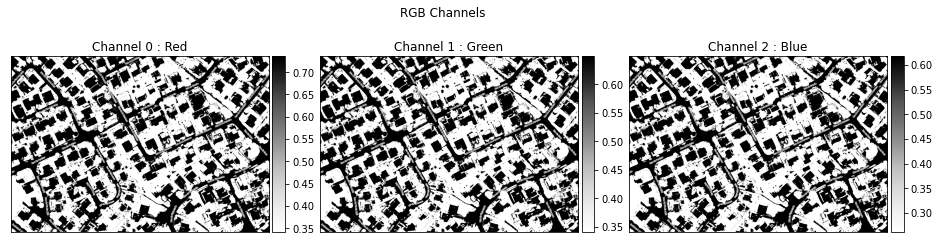

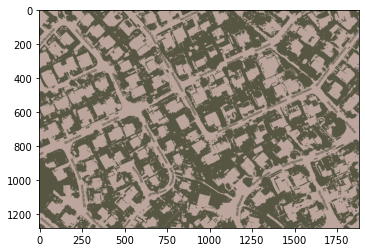

In [78]:
showRGBImage_channels(img_seg)
showRGBImage(img_seg)

### <span style="color:red"> Question 2.2 : </span>  Utilisez la technique des K-means segmenter au mieux les piscines pleines et non bachees.

#### Aide :
-> les coordonnees [942,1782], [868,1809], [823,1285], [767,1284], [183,1612], [257,119] sont sur des piscines pleines et non bachees.

#### Remarque :
-> Sur l'image les coordonnees sont inversees : X est la seconde coordonnee et Y la premiere.

In [ ]:
#sur segmenter l'image (ex : avec 20 classes)

VectorisedImage=Im.reshape((NbPix_X*NbPix_Y,NbChannels))

[VectorisedImageCenters,VectorisedImageSegmentation]= #...

ImageSegmentation = #...





### <span style="color:red"> Question 2.3 : </span> Creer une liste de labels observes dans les piscines puis generer une image segmentee avec les piscines seulement en fusionnant les labels observes dans des piscines

### <span style="color:red"> Question 2.4 : </span> Que se passe-t-il quand on veut aussi considerer les piscines vides et/ou bachees?

#### Aide :
-> les coordonnees [882,671], [299,1560] sont sur des piscines bachees
-> les coordonnees [1063,389] sont sur une piscine vide

# Exercice 3 - Apprentissage supervise pour la segmentation

### <span style="color:red"> Question 3.1 : </span> Sur l'image couleur 'Tournefeuille_RGB.png'. Utilisez un algorithme d'apprentissage supervise (ie random forset ou svm dans la librairie Scikit-learn) pour apprendre a detecter automatiquement les piscines (pleines et non bachees), puis les detecter.

La demarche sera la suivante : <br>
1) Identifier un groupe de points dans les piscines et un groupe de points a l'exterieur des piscines dans l'esprit de la question 2.2 tout en attribuant un label 1 a piscine et un label 0 a non-piscine. <br>
2) Utiliser ces points et labels pour apprendre les parametres qui permettent de detecter une piscine. <br>
3) Utiliser ces parametres pour detecter les piscines dans tous les points de l'image. 

In [ ]:
Im2=plt.imread('Tournefeuille_RGB.png')
Im=Im2*1.
showRGBImage_channels(Im)

### <span style="color:red"> Question 3.2 : </span> Que la methode marche bien ou pas, interpreter le resultat.

### <span style="color:red"> Question 3.3 : </span> Afin de robustifier l'apprentissage et les predictions, representez chaque point de l'image par l'information contenue dans son voisinage et pas seulement en sa coordonnee.
Par exemple, l'information du point [10,50] etait jusque la contenue dans Im[10,50] qui donne un vecteur du niveau d'intensite dans les canaux R, G, B aux coordonnees [10,50]. Elle pourra etre maintenant contenue dans en ce point plus son 8-voisinage : Im[10-1:10+2,50-1:50+2].
